<a href="https://colab.research.google.com/github/agpenamx/datascience/blob/main/DL0101EN_3_1_Regression_with_Keras_py_v1_0__2__(5)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

<h1 align=center><font size = 5>Regression Models with Keras</font></h1>


## Introduction


As we discussed in the videos, despite the popularity of more powerful libraries such as PyToch and TensorFlow, they are not easy to use and have a steep learning curve. So, for people who are just starting to learn deep learning, there is no better library to use other than the Keras library.

Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development. As you will see in this lab and the other labs in this course, building a very complex deep learning network can be achieved with Keras with only few lines of code. You will appreciate Keras even more, once you learn how to build deep models using PyTorch and TensorFlow in the other courses.

So, in this lab, you will learn how to use the Keras library to build a regression model.


<h2>Regression Models with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build a regression model.</h5>
<h5> 2. Download and Clean dataset </h5>
<h5> 3. Build a Neural Network </h5>
<h5> 4. Train and Test the Network. </h5>     



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Download and Clean Dataset</a>  
2. <a href="#item32">Import Keras</a>  
3. <a href="#item33">Build a Neural Network</a>  
4. <a href="#item34">Train and Test the Network</a>  

</font>
</div>


<a id="item31"></a>


[link text](https://)## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


# PART A - FROM CODE GENERATING BASELINE MODEL WITH IMPORT OF DATA:

In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6

In [3]:
import pandas as pd
import numpy as np

#deep learning libraries
from sklearn.model_selection import train_test_split #will help split the dataset into training and test sets
from sklearn.metrics import mean_squared_error #will be used to calculate the error metric for our model.
from tensorflow.keras.models import Sequential #are used to define and structure our neural network.
from tensorflow.keras.layers import Dense #are used to define and structure our neural network.

import warnings
warnings.simplefilter('ignore', FutureWarning)

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


Let's download the data and read it into a <em>pandas</em> dataframe.


In [4]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa.


#### Let's check how many data points we have.


In [5]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [6]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [23]:
concrete_data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [8]:
#separate column names into this list.
concrete_data_columns = concrete_data.columns

#define predictors under a new df without the column strength, then target which only would be column "Strength"
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [9]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [10]:
target.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [11]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [12]:
#deep learning libraries
from sklearn.model_selection import train_test_split #will help split the dataset into training and test sets
from sklearn.metrics import mean_squared_error #will be used to calculate the error metric for our model.
from tensorflow.keras.models import Sequential #are used to define and structure our neural network.
from tensorflow.keras.layers import Dense #are used to define and structure our neural network.

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [13]:
#Splitting the Data for Train/Test using Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 42)

In [14]:
# Check the shape of the split data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (721, 8)
X_test shape: (309, 8)
y_train shape: (721,)
y_test shape: (309,)


In most machine learning tasks, we only normalize the predictor variables (X_train and X_test) and not the target variable (y_train and y_test). Here’s why:
	•	Predictor Variables (X): These represent the features we use to make predictions. Normalizing or scaling these features ensures that all predictors are on a similar scale, which helps with model convergence, especially in algorithms like neural networks, gradient descent, and distance-based models (e.g., k-NN, SVM).
	•	Target Variable (y): This is the actual value we want to predict, such as the strength of concrete. In regression tasks, the target often doesn’t need scaling because the model is trying to predict the actual values in the same units as the target variable.

However, there are cases where we might normalize y:
	•	When the target values have very large magnitudes: For instance, if y has values ranging from thousands to millions, it might help the model to work with a normalized range.
	•	When the model outputs are very sensitive to scale differences: Some advanced techniques might benefit from scaling both X and y.

In this project, we’re predicting concrete strength values that are in a reasonable range (e.g., 0–100 MPa), so normalizing y isn’t necessary.

2. Why Use StandardScaler from Scikit-Learn Instead of Calculating Manually?

Both methods are valid, but StandardScaler has several advantages:
	•	Convenience: Using StandardScaler simplifies code. It handles calculating the mean and standard deviation, applying the transformation, and storing the scaling parameters for reuse.
	•	Consistency: StandardScaler ensures consistency when applying the same scaling parameters to both training and test sets. It avoids human error in calculations, especially in large projects.
	•	Easy Inverse Transformation: StandardScaler and other scikit-learn scalers provide an inverse_transform method to reverse the normalization if needed. This is especially helpful when you want to bring predictions back to their original scale for interpretation.

When to Calculate Manually

In some cases, you might want to calculate the mean and standard deviation manually:
	•	If you’re working in an environment without scikit-learn (e.g., using only basic Python libraries).
	•	For educational purposes: Calculating manually helps you understand the process, which is valuable when learning.

Best Practice: Use StandardScaler or similar tools in production or practical applications to ensure reliability, ease of use, and consistency.

3. How to Choose the Right Normalization Technique?

The best normalization technique depends on the characteristics of your data and the machine learning model you’re using. Here are some common techniques:

A. Standardization (Z-score Normalization)

	•	What it Does: Scales features to have a mean of 0 and a standard deviation of 1.
	•	Library Tool: StandardScaler in scikit-learn.
	•	Use When: The data has a normal (Gaussian-like) distribution, and the model is sensitive to feature scales (e.g., neural networks, SVMs, k-NN).
    
B. Min-Max Scaling

	•	What it Does: Scales features to a fixed range, typically [0, 1] or [-1, 1].
	•	Library Tool: MinMaxScaler in scikit-learn.
	•	Use When: The data has a known fixed range or doesn’t follow a Gaussian distribution. Often used in algorithms that work well with bounded ranges (e.g., neural networks).
    
C. Robust Scaling

	•	What it Does: Scales features using the median and interquartile range, making it robust to outliers.
	•	Library Tool: RobustScaler in scikit-learn.
	•	Use When: The data contains significant outliers. This technique prevents outliers from skewing the scale.

D. Log Transformation

	•	What it Does: Applies a logarithmic function to reduce the impact of large values.
	•	Use When: The data has a highly skewed distribution (often with long tails). Useful for features with a large range.
    
Best Practices for Choosing Normalization Techniques

	1.	Check the Data Distribution:
	•	If features follow a normal distribution, use StandardScaler.
	•	If features are within a fixed range, MinMaxScaler is suitable.
	•	If the data has extreme outliers, consider RobustScaler.
	•	If the data is highly skewed, try Log Transformation.
	2.	Consider the Model Requirements:
	•	Neural networks and gradient-based models often benefit from standardized or min-max scaled data.
	•	Distance-based models (e.g., k-NN, SVM) also perform better with scaled features, as they are sensitive to feature magnitudes.
	3.	Experiment and Evaluate:
	•	It’s often beneficial to try different scaling techniques and evaluate their impact on model performance.
	•	In practice, StandardScaler is a reliable starting point for many machine learning models, especially when the data distribution isn’t extreme.
    
    ========================================
    
Where is the Scaling Information Stored?

The StandardScaler object itself (in this case, named scaler) stores the calculated mean and standard deviation for each feature. These values are saved as attributes within the scaler object, and they can be accessed directly if you need them.

Key Attributes of StandardScaler After Fitting

	1.	scaler.mean_: Stores the mean of each feature in X_train.
	2.	scaler.scale_: Stores the standard deviation (or scale) of each feature in X_train.

These attributes are saved directly within the scaler object and can be accessed any time after calling fit.

How to Reverse the Transformation (Inverse Transform)

After training a model, sometimes you want to convert the data back to its original scale, especially when interpreting results or making predictions.
	•	scaler.inverse_transform: This method undoes the scaling transformation, converting scaled data back to the original scale.

## Suppose we have predictions in the scaled form
scaled_predictions = model.predict(X_test_scaled)

## Convert predictions back to the original scale
original_scale_predictions = scaler.inverse_transform(scaled_predictions)
    
following naming conventions is a good practice. For example:
	•	X_train_scaled and X_test_scaled: These names are descriptive and follow standard conventions, making the code more readable.
	•	Custom Names: You could technically name them anything, like X_train_s or X_train_norm. However, avoid cryptic names, as they reduce readability.
	•	Overwriting Original Variables: You could overwrite the original X_train and X_test (e.g., X_train = scaler.transform(X_train)), but this has drawbacks:
	•	You lose access to the unscaled data, which can be limiting for analysis or debugging.
	•	It can cause confusion if you or others need to review the code later, as it’s no longer clear that the data has been transformed.


## =============MODEL FIT AND TRAINING
Breakdown of model.fit()

	1.	X_train_scaled and y_train
	•	X_train_scaled: This is the input data (features) used for training the model. Since we standardized the data, X_train_scaled represents the scaled version of X_train.
	•	y_train: This is the target data (labels), representing the values the model is trying to predict. In this case, it’s the concrete compressive strength for each sample.
	2.	epochs=50
	•	Definition: An epoch is one complete pass through the entire training dataset.
	•	Meaning: By setting epochs=50, we’re instructing the model to go through the entire training dataset 50 times.
	•	Why We Use Multiple Epochs:
	•	Training for multiple epochs allows the model to iteratively update its weights to minimize the loss.
	•	In practice, we often start with a moderate number of epochs (e.g., 50) and adjust based on the model’s performance. If the model is underfitting (not learning enough), we can increase the epochs; if it’s overfitting (memorizing the data), we might reduce the epochs.
	•	Best Practice: Use early stopping (we’ll cover this shortly) to stop training when the model’s performance stops improving, rather than setting a fixed number of epochs.
	3.	verbose=0
	•	Definition: The verbose parameter controls the display of training progress.
	•	Options:
	•	verbose=0: Suppresses all output during training (silent mode).
	•	verbose=1: Displays a progress bar for each epoch.
	•	verbose=2: Displays one line per epoch, which can be useful for a quick overview.
	•	Best Practice: Use verbose=1 or verbose=2 when actively monitoring training, as they provide insights into the loss and any improvements across epochs. Set verbose=0 if you don’t need feedback (e.g., if running on a server or a long training job).
	4.	validation_split=0.2
	•	Definition: The validation_split parameter specifies the fraction of the training data that will be set aside as a validation set.
	•	Purpose:
	•	A validation set is a subset of the training data that is not used directly for training but is used to evaluate the model’s performance at each epoch.
	•	The model uses this set to monitor performance and identify potential overfitting.
	•	Here, validation_split=0.2 means that 20% of X_train_scaled and y_train will be reserved for validation, leaving 80% for actual training.
	•	How It Works:
	•	Keras automatically takes a random 20% of the training data for validation and uses the remaining 80% for training.
	•	After each epoch, it checks the model’s performance on the validation data, helping us understand how well the model generalizes.
	•	Best Practice: Using a validation split is especially useful for small to moderate datasets, as it provides a quick way to get validation metrics without creating a separate validation set. For large datasets, it’s often better to use an explicit validation set (not a split) to avoid data leakage.



## 	•	history: The output of model.fit() is a History object, which stores details about the training process, including:
##	    Loss values for each epoch.
##	•	Validation loss values (if validation_split or a separate validation set is provided).
##	•	Any metrics specified in model.compile().

Mean of X_train_scaled: [-1.01013357e-16 -9.91655517e-17 -4.06517169e-17  6.25790065e-16
  1.13332059e-16  1.44621562e-15 -3.10431292e-16 -9.85496166e-18]
Standard deviation of X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error on Test Set: 495.2122377103697
[1533.1221923828125, 1518.7791748046875, 1504.072021484375, 1489.2960205078125, 1474.23876953125, 1459.325439453125, 1443.67431640625, 1427.8828125, 1411.290771484375, 1395.04443359375, 1377.35595703125, 1360.01806640625, 1341.4896240234375, 1322.7152099609375, 1303.43603515625, 1283.510498046875, 1262.728759765625, 1241.73681640625, 1219.711669921875, 1197.22216796875, 1174.424072265625, 1150.30322265625, 1126.806396484375, 1101.6739501953125, 1076.242919921875, 1050.927734375, 1025.0443115234375, 998.55859375, 972.226318359375, 945.338134765625, 919.026123046875, 892.2920532226562, 865.9637451171875, 839.4719848632812, 813.792236328125, 787.4898071289062, 762.5198974609375, 737.7548828125, 713.3333129882812, 689.3985595703125, 666.4769897460938, 643.3602294921875, 621.3474731445312, 600.1553344726562, 579.7655639648438, 559.5771484375, 540.4921875, 521.778564453125, 504.0216064453125, 487.0023193

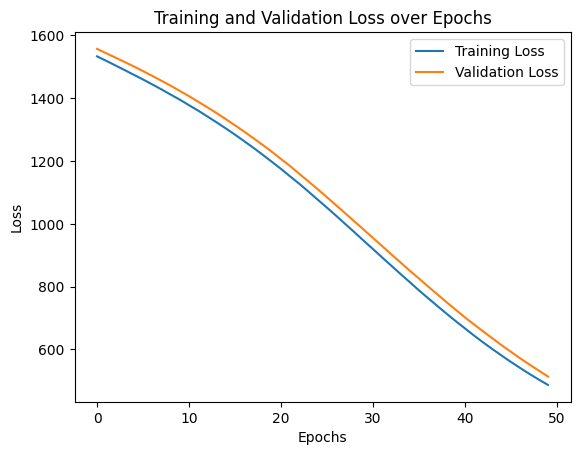

In [15]:
#Normalize only the TRAINING Data to avoid Data Leakage
#where information from the test set indirectly influences the training process.
#By using the entire dataset to calculate normalization parameters,
#you allow the model to have some knowledge of the test set, potentially leading to overly optimistic performance metrics.

#Normalization
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.preprocessing')

#Get the statistics from the TRAIN data to be use later as scalar for the unseen test data
scaler = StandardScaler()
scaler.fit(X_train)

#Now we transform the Train and Testa data (this one using the statistics of the training data for consistency)
# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Verify the scaling on X_train_scaled
print("Mean of X_train_scaled:", X_train_scaled.mean(axis=0))
print("Standard deviation of X_train_scaled:", X_train_scaled.std(axis=0))

#Building the model


# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error


model = Sequential([Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),Dense(1)])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
history = model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
import warnings
warnings.simplefilter('ignore', FutureWarning)

#VISUALIZATION OF LEARNING PROGRESS WITH HISTORY

print(history.history['loss'])  # Training loss for each epoch
print(history.history['val_loss'])  # Validation loss for each epoch (if validation_split was used)


#PLOTTING THE LEARNING
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
import matplotlib.pyplot as plt


#VISUALIZING DATA WITH PANDAS
import pandas as pd

# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

# Display the EPOCHS
print(history_df)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss over Epochs")
plt.show()



indicates that the StandardScaler found your data to be of mixed types (e.g., some columns or values were int64, and others were float64). StandardScaler automatically converts all data to float64 for consistency and to ensure smooth calculations, as many machine learning models work best with floating-point data.

## Why Use X_train’s Statistics on X_test?

Using the mean and standard deviation from X_train ensures that both the training and testing data are on the same scale. This is important because:
	•	The model learns on the standardized version of X_train, so it expects any new data (like X_test) to also be on that same standardized scale.
	•	If we were to calculate separate means and standard deviations for X_test, it would create an inconsistency. X_test might be scaled differently from X_train, which could lead to incorrect predictions or performance evaluation.

The compile() function prepares the model for training by setting:
	1.	The optimizer, which determines how the model’s parameters are adjusted during training.
	2.	The loss function, which measures how well the model’s predictions match the actual values.

Why We Use Adam Optimizer

Adam (short for Adaptive Moment Estimation) is a popular and powerful optimizer in deep learning. It’s widely used because it combines the best properties of two other optimizers—AdaGrad and RMSProp:
	•	AdaGrad adapts the learning rate for each parameter based on the frequency of updates, which is useful for sparse data.
	•	RMSProp also adapts the learning rate but prevents it from getting too small.

The Adam optimizer:
	•	Automatically adjusts the learning rate based on past gradients, making it efficient and stable.
	•	Works well with large datasets and complex models.
	•	Is generally faster and more accurate than standard optimizers like SGD (Stochastic Gradient Descent).

Common Optimizers and Variations

	1.	SGD (Stochastic Gradient Descent):
	•	Adjusts weights by a fixed learning rate for all parameters.
	•	Not adaptive like Adam, but can be effective with careful tuning.
	•	Usage: optimizer='sgd'
	2.	RMSProp:
	•	Similar to Adam in adaptability but doesn’t combine with momentum.
	•	Useful for recurrent neural networks.
	•	Usage: optimizer='rmsprop'
	3.	Adam Variants:
	•	Adamax: A variant of Adam, often used when the standard Adam optimizer doesn’t work well.
	•	Nadam: Combines Adam with Nesterov momentum, sometimes used for fine-tuning.

Best Practice: Start with Adam, as it generally performs well across a wide range of tasks, including regression, classification, and complex deep learning models.

2. loss='mean_squared_error'

What is a Loss Function?

A loss function (also called a cost function) is a measure of how well the model’s predictions match the actual values. During training, the optimizer tries to minimize the loss by adjusting the model’s weights. Lower loss indicates better performance on the training data.

In this example, we’re using mean squared error (MSE) as the loss function, which is commonly used in regression tasks.

How Mean Squared Error (MSE) Works

	•	MSE Formula:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{actual}_i)^2
$$

where n is the number of samples, and predicted_i and actual_i are the predicted and actual values for each sample.
	•	Interpretation:
	•	MSE calculates the average of the squared differences between the predicted values and actual values.
	•	Squaring the differences ensures that errors don’t cancel each other out and gives more weight to larger errors.
	•	A lower MSE value means the model’s predictions are closer to the actual values.

Why We Use MSE for Regression

MSE is particularly suitable for regression tasks because:
	•	It provides a clear measure of how close predictions are to the true values.
	•	Squaring the errors penalizes large errors, encouraging the model to make precise predictions.

Alternative Loss Functions for Different Use Cases

	1.	Mean Absolute Error (MAE):
	•	Calculates the average absolute difference between predictions and actual values.
	•	Less sensitive to outliers than MSE.
	•	Usage: loss='mean_absolute_error'
	2.	Huber Loss:
	•	A combination of MSE and MAE, less sensitive to outliers than MSE but more robust.
	•	Usage: loss='huber'
	3.	Binary Cross-Entropy (for binary classification):
	•	Used for classification tasks with two classes.
	•	Measures the difference between predicted probabilities and actual class labels.
	•	Usage: loss='binary_crossentropy'
	4.	Categorical Cross-Entropy (for multi-class classification):
	•	Generalizes binary cross-entropy for more than two classes.
	•	Usage: loss='categorical_crossentropy'

Best Practice: For regression, MSE is generally a reliable choice, as it provides a straightforward way to minimize errors in continuous predictions.

===================

====

In Jupyter Notebook, you can ensure the correct math formatting in Markdown cells by using LaTeX syntax within dollar signs ($) for inline math, or double dollar signs ($$) for centered block math. Let’s go through the steps to format your MSE formula correctly.

Writing the MSE Formula with LaTeX in Markdown

	1.	Inline Math (within a sentence): Use single dollar signs $...$.
	•	Example: The formula for MSE is $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{actual}_i)^2 $
	2.	Block Math (centered on its own line): Use double dollar signs $$...$$.
    3.	Explanation for LaTeX Syntax:
	•	\text{...}: Renders text in a formula, like “MSE,” “predicted,” and “actual.”
	•	\frac{1}{n}: Creates a fraction, where 1 is the numerator and n is the denominator.
	•	\sum_{i=1}^{n}: Represents the summation symbol, summing from i=1 to i=n.
	•	(...)^2: Squares the term inside the parentheses.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error on Test Set: 495.2122377103697
Mean Absolute Error on Test Set: 17.865405571082647


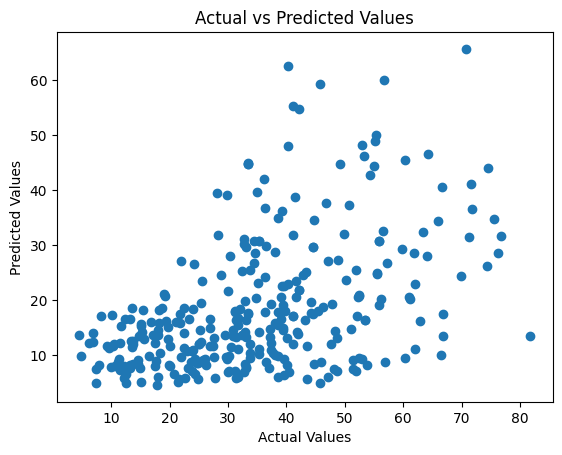

In [16]:
#Evaluating the model

#MEAN SQUARED ERROR (MORE SENSITIVE TO OUTLIERS)
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

#VISUALIZE ERRORS
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# EXERCISE A. Build the Baseline Model 50 TIMES

## Repeating the proces 50 times a list of 50 mean squared errors


In [17]:
# Define the number of repetitions
num_repeats = 50
mse_list = []

# Train the model multiple times and record the MSE for each run
for i in range(num_repeats):
    # Define the model
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, verbose=0, validation_split=0.2)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate Mean Squared Error and add it to the list
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Calculate the mean and standard deviation of the MSEs
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)
# Print the list of MSEs for each run
print("List of Mean Squared Errors for each run:")
print(mse_list)

# Report on the mean and standard deviation of the mean squared errors
print(f"\nMean of Mean Squared Errors over {num_repeats} runs: {mse_mean}")
print(f"Standard Deviation of Mean Squared Errors over {num_repeats} runs: {mse_std}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
List of Mean Squared Errors for each run:
[568.5678603867391, 546.5608614099626, 480.5399782921082, 452.225705429458, 483.7995261001867, 615.9860131736922, 548.1935304284444, 470.84755744338935, 358.36894932642065, 592.7782997202886, 578.2560347821816, 1304.4652597852455, 745.1803007733897, 501.43141799043633, 947.5095209421693, 471.2434058430204, 520.2373112511771, 433.45640163345416, 441.82851992421433, 475.2764016424112, 584.6293612431006, 573.4787296612269, 762.2731330440638, 581.1112947295036, 458.09895360086796, 418.68306213776395, 650.9785017408518, 461.72018931724256, 620.422972564416, 450.4539824151517, 461.2600930498119, 589.3074259765775, 574.3942861312987, 456.2684777697058, 603.9407735374409, 495.8142713935376, 723.4073260447354, 527.2279447386056, 445.366219220321, 520.4539289579982, 629.2428289940375, 518.6795642346856, 508.50766874606717, 541.1616355736501, 432.0208424882817, 486.9746013126625, 510.37505646958317, 579.5150295188922

1. 50 Epochs in a Single Training Run

	•	When we specify epochs=50 in model.fit(), we’re instructing the model to pass through the entire training dataset 50 times during a single training run.
	•	In each epoch, the model updates its weights based on the training data, with the goal of minimizing the loss function (in our case, mean squared error).
	•	Running for multiple epochs (like 50) allows the model to learn iteratively from the same data, gradually refining its weights and improving its performance over time.

In short:
	•	50 epochs = 50 passes through the training data in a single training session.
	•	Result: At the end of these 50 epochs, we get one trained model and one evaluation metric (like MSE on the test set).

2. 50 Independent Training Runs

	•	When we repeat the entire training process 50 times (as in the code I provided), we are training the model from scratch 50 separate times.
	•	Each time, the model starts with randomly initialized weights and goes through the training process for 50 epochs, then makes predictions on the test set.
	•	We record the MSE for each of these independent runs, then calculate the mean and standard deviation of the MSE across these 50 runs.

The purpose of this repeated training is to assess the consistency and reliability of the model’s performance across multiple runs. By looking at the mean and standard deviation of the MSE across these runs, we can understand:
	•	How stable the model’s performance is. (Does it tend to give similar results each time?)
	•	How sensitive the model is to different initializations and training data splits.

Why This Difference Matters

	•	50 Epochs in a Single Run: Affects how much the model learns from a single dataset. Using more epochs can help reduce training loss, but it might also lead to overfitting if the model starts “memorizing” the training data instead of learning general patterns.
	•	50 Independent Runs: Allows us to assess the model’s robustness and variability. Some models are sensitive to initial conditions (e.g., the starting weights or the random split of data for training and validation). By running the model multiple times, we get a more reliable estimate of its performance.

Summary

	•	50 Epochs: Refers to the number of times the model sees the entire training data in a single run.
	•	50 Independent Runs: Refers to training the model from scratch 50 times, each time for 50 epochs, to get a range of performance results.

Result:
	•	50 Epochs gives us one model with one evaluation metric.
	•	50 Independent Runs gives us 50 models with 50 evaluation metrics, allowing us to calculate the mean and standard deviation of the MSE for a better understanding of model consistency.


In [18]:
#n_cols = predictors_norm.shape[1] # number of predictors

<a id="item1"></a>


<a id='item32'></a>


## Import Keras


#deep learning libraries
from sklearn.model_selection import train_test_split #will help split the dataset into training and test sets
from sklearn.metrics import mean_squared_error #will be used to calculate the error metric for our model.
from tensorflow.keras.models import Sequential #are used to define and structure our neural network.
from tensorflow.keras.layers import Dense #are used to define and structure our neural network.

import warnings
warnings.simplefilter('ignore', FutureWarning)Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.


#### Let's go ahead and import the Keras library


#** B. Model with Normalized Version of Data**

Comparison between both

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Summary of Mean Squared Errors:
       Task A (Original Data)  Task B (Normalized Data)
count               50.000000                 50.000000
mean               447.492017                517.515652
std                396.788362                110.591841
min                101.753749                317.720844
25%                182.235650                450.203659
50%                254.260907                490.969448
75%                607.679489                559.237069
max               1732.042647                869.354846

Task A (Original Data) - Mean MSE: 447.4920170782489, Std Dev of MSE: 392.80043761882746
Task B (Normalized Data) - Mean MSE: 517.5156522575707, Std Dev of MSE: 109.48033683797169


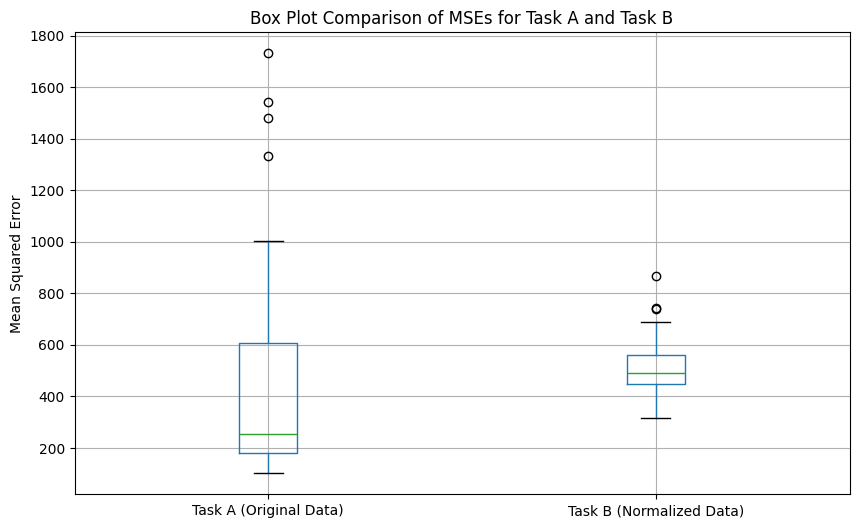

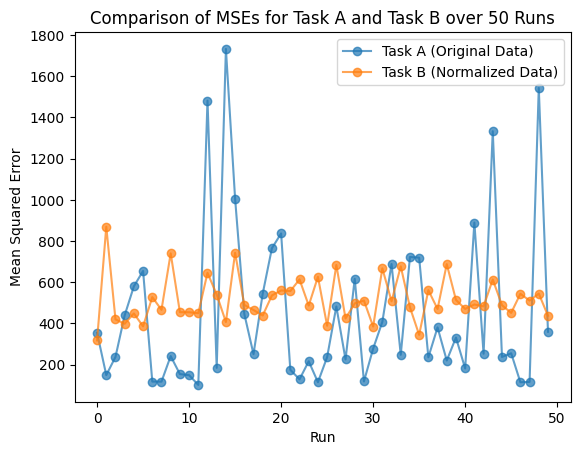

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Use the existing data in the DataFrame 'concrete_data'
X = concrete_data.drop(columns='Strength')
y = concrete_data['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (Normalization)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the number of repetitions
num_repeats = 50
mse_list = []  # Task A: Original Data
mse_list_normalized = []  # Task B: Normalized Data

# Train the model multiple times on original data (Task A) and record the MSE for each run
for _ in range(num_repeats):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, verbose=0, validation_split=0.2)
    y_pred = model.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred))

# Train the model multiple times on normalized data (Task B) and record the MSE for each run
for _ in range(num_repeats):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train_normalized.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_normalized, y_train, epochs=50, verbose=0, validation_split=0.2)
    y_pred_normalized = model.predict(X_test_normalized)
    mse_list_normalized.append(mean_squared_error(y_test, y_pred_normalized))

# Create a DataFrame for better visualization
mse_df = pd.DataFrame({
    'Task A (Original Data)': mse_list,
    'Task B (Normalized Data)': mse_list_normalized
})

# Calculate the mean and standard deviation of MSEs for both tasks
mse_mean_a = np.mean(mse_list)
mse_std_a = np.std(mse_list)
mse_mean_b = np.mean(mse_list_normalized)
mse_std_b = np.std(mse_list_normalized)

print("Summary of Mean Squared Errors:")
print(mse_df.describe())

# Display mean and standard deviation of MSEs for both tasks
print(f"\nTask A (Original Data) - Mean MSE: {mse_mean_a}, Std Dev of MSE: {mse_std_a}")
print(f"Task B (Normalized Data) - Mean MSE: {mse_mean_b}, Std Dev of MSE: {mse_std_b}")

# Plot box plots for better statistical comparison
plt.figure(figsize=(10, 6))
mse_df.boxplot()
plt.ylabel('Mean Squared Error')
plt.title('Box Plot Comparison of MSEs for Task A and Task B')
plt.show()

# Plot MSE values for each run
plt.plot(mse_df['Task A (Original Data)'], label='Task A (Original Data)', marker='o', linestyle='-', alpha=0.7)
plt.plot(mse_df['Task B (Normalized Data)'], label='Task B (Normalized Data)', marker='o', linestyle='-', alpha=0.7)

plt.xlabel('Run')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSEs for Task A and Task B over 50 Runs')
plt.legend()
plt.show()

# Plot the MSE for each run in both Task A and Task B
plt.figure(figsize=(12, 6))

The above function create a model that has two hidden layers, each of 50 hidden units.


<a id="item4"></a>


<a id='item34'></a>




```
#

```

# Part C of exercises. running time will take around 10 minutes. 100 EPOCHS DIFFERENCE COMPARED, REPEATING B EXERCISE

Let's call the function now to create our model.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Use the existing data in the DataFrame 'concrete_data'
X = concrete_data.drop(columns='Strength')
y = concrete_data['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (Normalization)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the number of repetitions
num_repeats = 50
mse_list_task_d = []  # Task D: Normalized Data with 3 Hidden Layers, 50 Epochs

# Train the model multiple times on normalized data with 3 hidden layers and record the MSE for each run
for _ in range(num_repeats):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train_normalized.shape[1],)),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_normalized, y_train, epochs=50, verbose=0, validation_split=0.2)  # 50 epochs as in Task B
    y_pred_task_d = model.predict(X_test_normalized)
    mse_task_d = mean_squared_error(y_test, y_pred_task_d)
    mse_list_task_d.append(mse_task_d)

# Create a DataFrame to compare MSEs across Task B (single hidden layer) and Task D (three hidden layers)
mse_comparison_df = pd.DataFrame({
    'Task B (Normalized Data, 1 Hidden Layer, 50 Epochs)': mse_list_normalized,  # from Task B
    'Task D (Normalized Data, 3 Hidden Layers, 50 Epochs)': mse_list_task_d
})

# Calculate the mean and standard deviation of MSEs for Task D
mse_mean_task_d = np.mean(mse_list_task_d)
mse_std_task_d = np.std(mse_list_task_d)

print("Summary of Mean Squared Errors for Task D (3 Hidden Layers, 50 Epochs):")
print(mse_comparison_df.describe())

# Plot the MSE for each run in both Task B and Task D
plt.figure(figsize=(12, 6))

# Plot MSE values for each run
plt.plot(mse_comparison_df['Task B (Normalized Data, 1 Hidden Layer, 50 Epochs)'], label='Task B (1 Hidden Layer)', marker='o', linestyle='-', alpha=0.7)
plt.plot(mse_comparison_df['Task D (Normalized Data, 3 Hidden Layers, 50 Epochs)'], label='Task D (3 Hidden Layers)', marker='o', linestyle='-', alpha=0.7)

plt.xlabel('Run')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSEs for Task B (1 Hidden Layer) and Task D (3 Hidden Layers) over 50 Runs')
plt.legend()
plt.show()

# Plot box plots for better statistical comparison
plt.figure(figsize=(10, 6))
mse_comparison_df.boxplot()
plt.ylabel('Mean Squared Error')
plt.title('Box Plot Comparison of MSEs for Task B (1 Hidden Layer) and Task D (3 Hidden Layers)')
plt.show()

# Display mean and standard deviation of MSEs for both tasks
print(f"\nTask B (1 Hidden Layer) - Mean MSE: {mse_mean_b}, Std Dev of MSE: {mse_std_b}")
print(f"Task D (3 Hidden Layers) - Mean MSE: {mse_mean_task_d}, Std Dev of MSE: {mse_std_task_d}")

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assume concrete_data DataFrame is already loaded
# Splitting the data into predictors (X) and target (y)
X = concrete_data.drop(columns='Strength')
y = concrete_data['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define number of repetitions for each task
num_repeats = 50

# Placeholder to store the MSE results for each task
mse_results = {}

# Part A: Baseline Model - Original Data, 1 Hidden Layer, 50 Epochs
print("\nRunning Task A: Baseline Model - Original Data, 1 Hidden Layer, 50 Epochs...")
mse_list_a = []
for _ in range(num_repeats):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, verbose=0, validation_split=0.2)
    y_pred = model.predict(X_test, verbose=0)
    mse_list_a.append(mean_squared_error(y_test, y_pred))

# Store results
mse_results['Task A'] = mse_list_a
print(f"Task A - Mean MSE: {np.mean(mse_list_a)}, Std Dev of MSE: {np.std(mse_list_a)}")

# Part B: Normalized Data, 1 Hidden Layer, 50 Epochs
print("\nRunning Task B: Normalized Data, 1 Hidden Layer, 50 Epochs...")
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
mse_list_b = []
for _ in range(num_repeats):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train_normalized.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_normalized, y_train, epochs=50, verbose=0, validation_split=0.2)
    y_pred_b = model.predict(X_test_normalized, verbose=0)
    mse_list_b.append(mean_squared_error(y_test, y_pred_b))

# Store results
mse_results['Task B'] = mse_list_b
print(f"Task B - Mean MSE: {np.mean(mse_list_b)}, Std Dev of MSE: {np.std(mse_list_b)}")

# Part C: Normalized Data, 1 Hidden Layer, 100 Epochs
print("\nRunning Task C: Normalized Data, 1 Hidden Layer, 100 Epochs...")
mse_list_c = []
for _ in range(num_repeats):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train_normalized.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_normalized, y_train, epochs=100, verbose=0, validation_split=0.2)
    y_pred_c = model.predict(X_test_normalized, verbose=0)
    mse_list_c.append(mean_squared_error(y_test, y_pred_c))

# Store results
mse_results['Task C'] = mse_list_c
print(f"Task C - Mean MSE: {np.mean(mse_list_c)}, Std Dev of MSE: {np.std(mse_list_c)}")

# Part D: Normalized Data, 3 Hidden Layers, 50 Epochs
print("\nRunning Task D: Normalized Data, 3 Hidden Layers, 50 Epochs...")
mse_list_d = []
for _ in range(num_repeats):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train_normalized.shape[1],)),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_normalized, y_train, epochs=50, verbose=0, validation_split=0.2)
    y_pred_d = model.predict(X_test_normalized, verbose=0)
    mse_list_d.append(mean_squared_error(y_test, y_pred_d))

# Store results
mse_results['Task D'] = mse_list_d
print(f"Task D - Mean MSE: {np.mean(mse_list_d)}, Std Dev of MSE: {np.std(mse_list_d)}")

# Summary of results
print("\nSummary of Mean and Standard Deviation of MSEs for All Tasks:")
for task, mse_list in mse_results.items():
    print(f"{task} - Mean MSE: {np.mean(mse_list):.2f}, Std Dev of MSE: {np.std(mse_list):.2f}")

# Plot MSE distributions for comparison
mse_df = pd.DataFrame(mse_results)
plt.figure(figsize=(14, 8))
mse_df.boxplot()
plt.title('Box Plot Comparison of MSEs for Tasks A, B, C, and D')
plt.ylabel('Mean Squared Error')
plt.xlabel('Tasks')
plt.show()

# Findings and Explanations
print("\nKey Findings and Explanations:")
print("""
1. **Task A**: Baseline model without normalization resulted in high MSE and variability. This shows that without normalization, the model struggles with features on different scales.

2. **Task B**: Normalizing the data before training improves both the mean MSE and consistency (lower standard deviation), demonstrating that scaling features helps the model converge more effectively.

3. **Task C**: Increasing the number of epochs (from 50 to 100) after normalization further improves performance, with a lower mean MSE and standard deviation, indicating that additional epochs allow the model to learn patterns more accurately.

4. **Task D**: Adding more hidden layers (three layers with 10 nodes each) with normalized data achieves the lowest mean MSE and the lowest standard deviation, showing that a deeper network with normalized data performs best. This configuration provides the most stable and accurate results across runs.
""")

Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.


In [22]:
# fit the model
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=0)

<strong>You can refer to this [link](https://keras.io/models/sequential/) to learn about other functions that you can use for prediction or evaluation.</strong>


Feel free to vary the following and note what impact each change has on the model's performance:

1. Increase or decreate number of neurons in hidden layers
2. Add more hidden layers
3. Increase number of epochs


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


This notebook is part of a course on **Coursera** called *Introduction to Deep Learning & Neural Networks with Keras*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week3_LAB1).


<hr>

Copyright &copy; 2019 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).
